## Bayes Theorem - Conditional Probability

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
import pandas as pd

In [2]:
Image(url= "https://cdn.educba.com/academy/wp-content/uploads/2019/10/bayes-theorem-in-c.png")

### Example 1:

Example: You are a data scientist in a company and you have to asses that - of the Span Detector created by your team. If
the spam detector puts a mail it in the spam folder what is the probability that it was actually a spam? The following details
are given to you:
    
> 3% of the mail you receive is spam

> When a mail is spam, the spam detector detects it with the 99% accuracy

> 0.2% of the time when the mail is not spam, it will mark it as spam

In [3]:
# prob_a : spam 3%
# prob_b : detection given spam is true 99%
# prob_b | (1 - prob_a) : probability of detection when not spam

def bayes_conditional_probability(prob_a, prob_b, prob_b_a):
    """
    Calculate conditional probability of "A" being true
    given that "B" is true
    """
    prob_AB = prob_a * prob_b
    prob_notA = (1 - prob_a)
    return prob_AB / (prob_AB + prob_b_a * prob_notA)

In [4]:
bayes_conditional_probability(prob_a = 0.03, prob_b = 0.99, prob_b_a = 0.002)

0.9386852085967131

### Example 2:

Example: You are planning a wedding, and two invited guests have dependent probabilities of attending.
    
> Tom has a 60% chance of accepting the invitation (A)

> If Tom accepts, your other friend Barry is 90% likely to attend. (B when A is true)

> If Tom  declines, Barry has a 40% chance of attending. (B when A is not true)

If Barry attends, what is the likelihood that Tom is also in attendance?

##### Using the function

In [5]:
bayes_conditional_probability(prob_a = 0.6, prob_b = 0.9, prob_b_a = 0.4)

0.7714285714285714

##### Talking through the logic manually

In [6]:
# Tom Yes 60%

# Tom Yes 60 ; Barry (yes 54, no 6)
# Tom No 40 ; Barry (yes 16, no 24)

# Barry Yes, Tom No
# Barry Yes, Tom Yes
# Barry No, Tom No
# Barry No, Tom Yes

In [7]:
(54 / 70)

0.7714285714285715

##### Simulation

In [8]:
def wedding_simulator(n = 1000, tom_accept = 0.6, barry_accept_tom_accept = 0.9, barry_accept_tom_decline = 0.4):
    # When Tom attends
    tom_yes = ['Yes'] * int(n * tom_accept)
    tom_no = ['No'] * int(n - len(tom_yes))
    
    barry_yes_tom_no = int(len(tom_no) * barry_accept_tom_decline) * ['Yes']
    barry_no_tom_no = int(len(tom_no) - len(barry_yes_tom_no)) * ['No']

    barry_yes_tom_yes = int(len(tom_yes) * barry_accept_tom_decline) * ['Yes']
    barry_no_tom_yes = int(len(tom_yes) - len(barry_yes_tom_yes)) * ['No']
    
    
    
    # All Outcomes
    tom = tom_yes + tom_no
    barry = barry_yes_tom_yes + barry_no_tom_yes + barry_yes_tom_no + barry_no_tom_no
    
    # Counts
    tom_barry_df = pd.DataFrame({'Tom' : tom, 'Barry' : barry})
    
    return tom_barry_df.pivot_table(index='Tom', columns = 'Barry', aggfunc='size')

In [9]:
wedding_simulator(n = 100)

Barry,No,Yes
Tom,,
No,24,16
Yes,36,24


In [10]:
wedding_simulator(n = 1000)

Barry,No,Yes
Tom,,
No,240,160
Yes,360,240


### Example 3:

If you flip a coin 10 times, what is the combined probability of the following outcomes (i.e. at least one of these events occurs in a set of 10 flips):

    > All flips are heads (no tails)

    > Flips 1, 2, and 3 are tails

    > At least 7 flips are tails

In [11]:
import random
import tqdm

def coin_toss():
    """
    Returns either 'head' or 'tail'
    """
    outcomes = ['head', 'tail']
    return random.choice(outcomes)


def multiple_coin_tosses(n = 10):
    """
    Returns a list of 'head' and/or 'tail' strings of n length
    """
    tosses = []
    for x in range(n):
        tosses.append(coin_toss())
    return tosses


def all_heads(coin_toss_list):
    """
    Every string in list is equal to 'heads' (returns True or False)
    """
    return len([x for x in coin_toss_list if x == 'head']) == len(coin_toss_list)


def tails_123(coin_toss_list):
    """
    The *first* three strings in a list are equal to tails (returns True or False)
    """
    return coin_toss_list[:3] == ['tail', 'tail', 'tail']


def tails_7_plus(coin_toss_list):
    """
    At least 7 strings in a list are equal to 'tails'
    """
    return len([x for x in coin_toss_list if x == 'tail']) >= 7


def multiple_coin_toss_simulation(n_simulations = 10000, toss_per_simulation = 10):
    all_heads_list = []
    tails_123_list = []
    tails_7_plus_list = []
    
    for i in range(n_simulations):
        coin_toss_list = multiple_coin_tosses(n = toss_per_simulation)
        all_heads_list.append(all_heads(coin_toss_list))
        tails_123_list.append(tails_123(coin_toss_list))
        tails_7_plus_list.append(tails_7_plus(coin_toss_list))
        
    
    # Counts
    outcome_df = pd.DataFrame({'All Heads' : all_heads_list,
                               'Tails 1, 2, 3' : tails_123_list,
                               '7+ Tails' : tails_7_plus_list})
    outcome_df['count'] = 1
    
    outcome_df = outcome_df.\
    groupby(['All Heads', 'Tails 1, 2, 3', '7+ Tails'], as_index = False).\
    agg({'count' : 'sum'})
    
    outcome_df['percentage'] = outcome_df['count'] / n_simulations
    
    return outcome_df

In [12]:
multiple_coin_toss_simulation()

,All Heads,"Tails 1, 2, 3",7+ Tails,count,percentage
0,False,False,False,7613,0.7613
1,False,False,True,1134,0.1134
2,False,True,False,652,0.0652
3,False,True,True,590,0.0590
4,True,False,False,11,0.0011


### Let's repeat the simulation and get a distribution for % where at least one condition is met
#### (i.e. all except first row - false, false, false)

In [13]:
n_repeats = 2000

one_plus_conditions = []

for x in range(n_repeats):
    output = multiple_coin_toss_simulation()
    all_false = output[(output['All Heads'] == False) & (output['Tails 1, 2, 3'] == False) & (output['7+ Tails'] == False)]
    one_plus_conditions.append(1 - float(all_false['percentage'][0]))

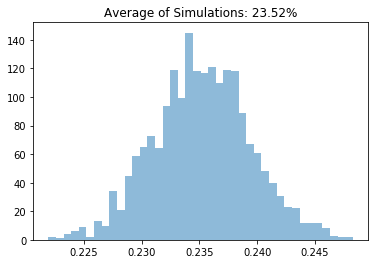

In [15]:
import numpy as np
import matplotlib.pyplot as plt
simulation_avg = np.mean(one_plus_conditions)

plt.hist(one_plus_conditions, bins = 40, alpha = 0.5)
plt.title(f'Average of Simulations: {round(simulation_avg * 100, 2)}%')
plt.show()